In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_c=df.drop(["sex", "smoker", "region"], axis=1).copy() #only continuous variable dataset will be used for plots

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Basic Histogram

Text(0.5, 0, 'Region')

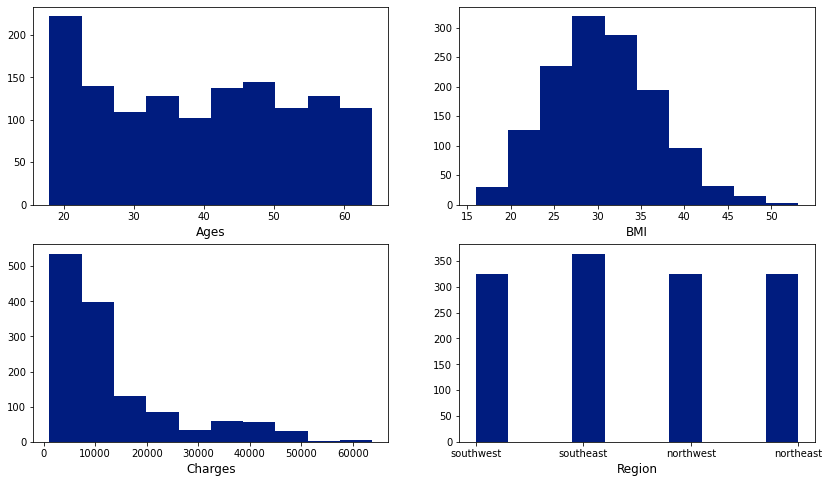

In [7]:
plt.figure(figsize=(14,8))
style.use("seaborn-dark-palette")
plt.subplot(2,2,1)
plt.hist(df["age"])
plt.xlabel("Ages", fontsize=12)
plt.subplot(2,2,2)
plt.hist(df["bmi"])
plt.xlabel("BMI", fontsize=12)
plt.subplot(2,2,3)
plt.hist(df["charges"])
plt.xlabel("Charges", fontsize=12)
plt.subplot(2,2,4)
plt.hist(df["region"])
plt.xlabel("Region", fontsize=12)

# Correlation

In [9]:
corr_mat=df_c.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

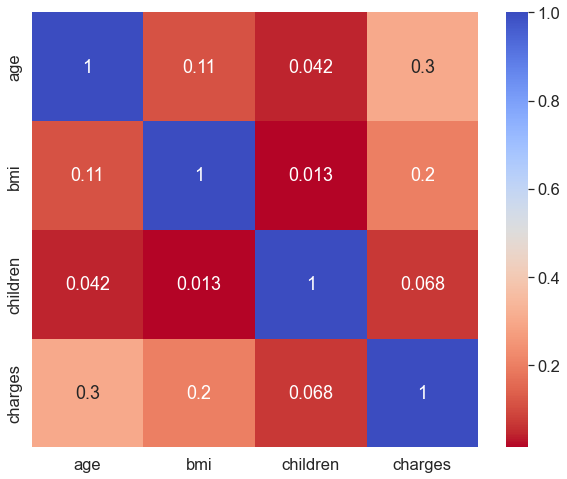

In [10]:
plt.figure(figsize=(10,8))
corar=np.array(corr_mat.values)
sns.set(font_scale=1.5)
sns.heatmap(corr_mat, annot=corar,cmap="coolwarm_r")

In [11]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
df.loc[(df.age>17) & (df.age<=30), "age_cat"]="Young Adult"
df.loc[(df.age>30) & (df.age<=59), "age_cat"]="Adult"
df.loc[(df.age>59), "age_cat"]="Old"
df

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


Adult          780
Young Adult    444
Old            114
Name: age_cat, dtype: int64


([<matplotlib.patches.Wedge at 0x1ca68db8d90>,
 [Text(-0.30922189662362254, 1.159474802938162, 'Young Adult'),
  Text(-0.007748139924787676, -1.0999727116286595, 'Adult'),
  Text(1.0608289775377782, -0.29093277645557974, 'Old')],
 [Text(-0.18037943969711315, 0.6763603017139278, '58.3%'),
  Text(-0.004226258140793277, -0.5999851154338142, '33.2%'),
  Text(0.5786339877478789, -0.1586906053394071, '8.5%')])

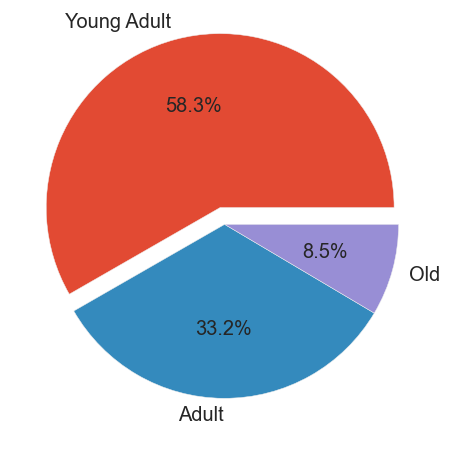

In [14]:
labels=df.age_cat.unique().tolist()
count=df.age_cat.value_counts()
print(count)
count=count.values
style.use("ggplot")
plt.figure(figsize=(8,8))
explode=(0.1,0,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})

The pie chart shows that our datasets has more Children and Young adults by count than adult and old.

Text(0, 0.5, 'Charges Standard Deviation')

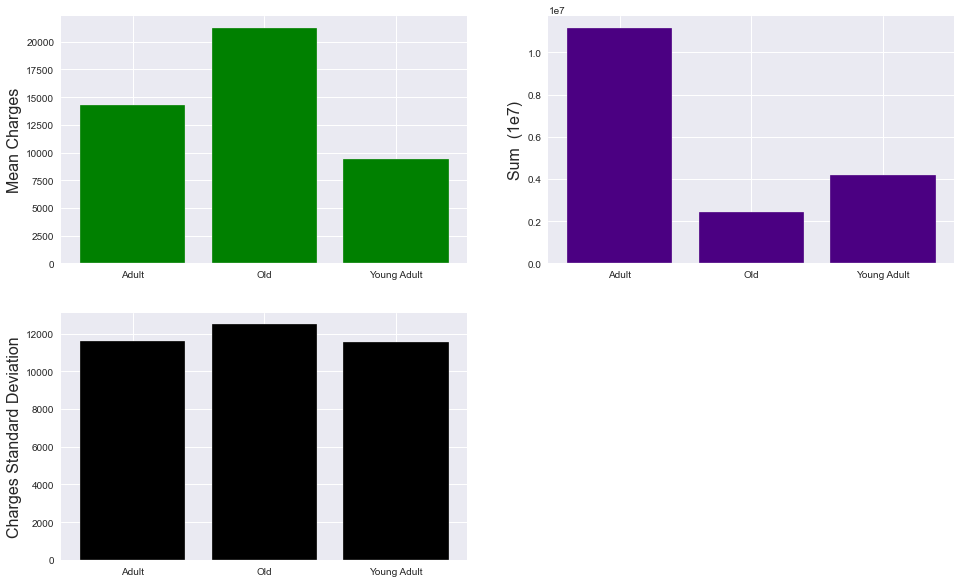

In [16]:
charge_avg_age=df.groupby("age_cat")["charges"].mean()
labels_avg=charge_avg_age.keys()
charge_avg_age=charge_avg_age.tolist()

charge_sum_age=df.groupby(["age_cat"])["charges"].sum()
labels_sum=charge_sum_age.keys()
charge_sum_age=charge_sum_age.tolist()

charge_std_age=df.groupby(["age_cat"])["charges"].std()
labels_std=charge_std_age.keys()
charge_std_age=charge_std_age.tolist()


style.use("seaborn")
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.bar(labels_avg, charge_avg_age, color="green")
plt.ylabel("Mean Charges", fontsize=16)
plt.subplot(2,2,2)
plt.bar(labels_sum, charge_sum_age, color="indigo")
plt.ylabel("Sum  (1e7)", fontsize=16)
plt.subplot(2,2,3)
plt.bar(labels_sum, charge_std_age, color="black")
plt.ylabel("Charges Standard Deviation", fontsize=16)

In [17]:
df["log_charges"]=np.log(df["charges"])
df

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867


Text(0.5, 0, 'Log of Charges')

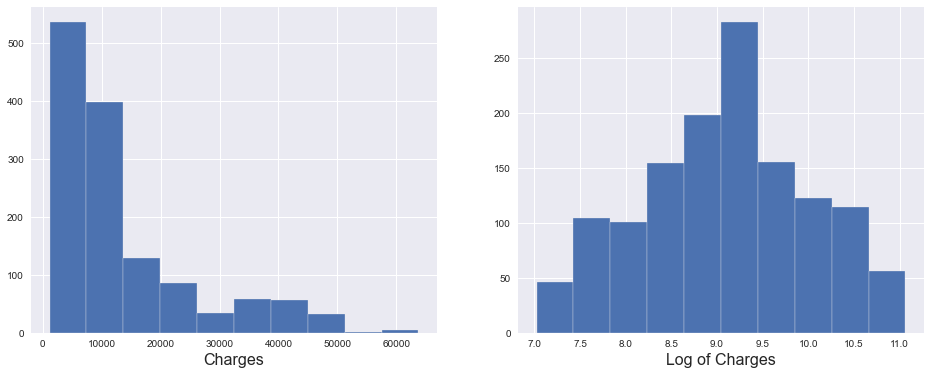

In [20]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
df["charges"].hist()
plt.xlabel("Charges", fontsize=16)


plt.subplot(1,2,2)
df["log_charges"].hist()
plt.xlabel("Log of Charges", fontsize=16)

C:\Users\fawad.kamil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fawad.kamil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='log_charges'>

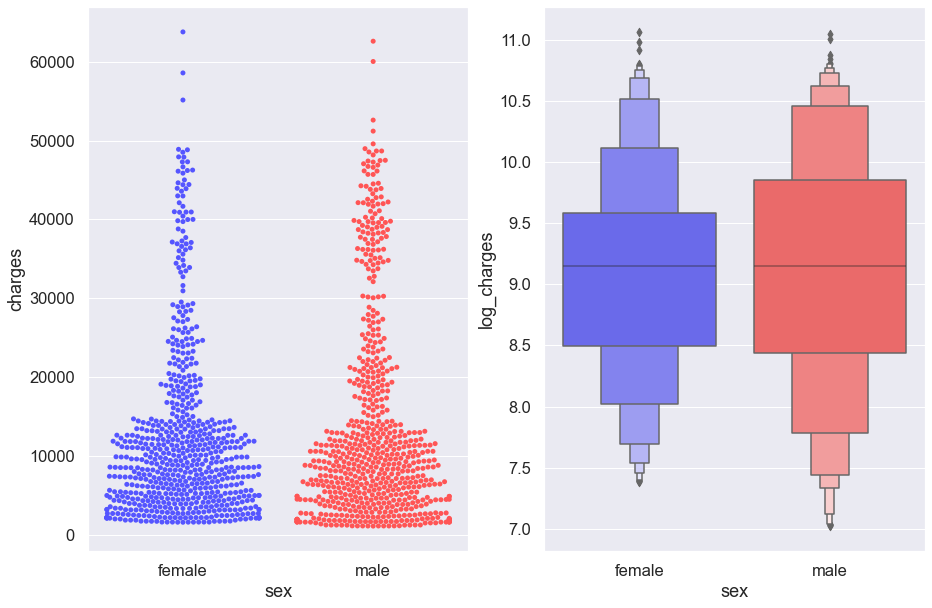

In [21]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(df["sex"], df["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(df["sex"], df["log_charges"], palette ="seismic")

C:\Users\fawad.kamil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='bmi'>

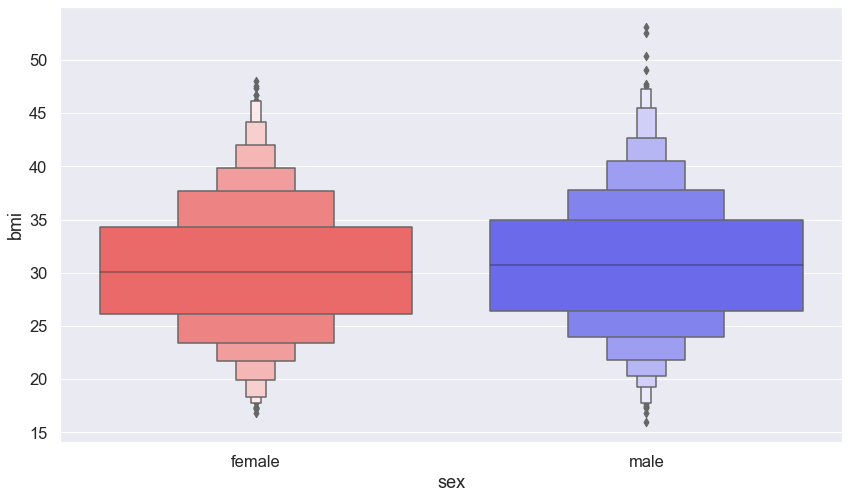

In [23]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.boxenplot(df["sex"], df["bmi"], palette ="seismic_r")

In [26]:
df.loc[(df.age<19), "bmi_cat"]="Underweight"
df.loc[(df.age>=19) & (df.age<=25), "bmi_cat"]="Normal"
df.loc[(df.age>25) & (df.age<=30), "bmi_cat"]="Overweight"
df.loc[(df.age>30), "bmi_cat"]="Obese"
df

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal


Text(0, 0.5, 'Count')

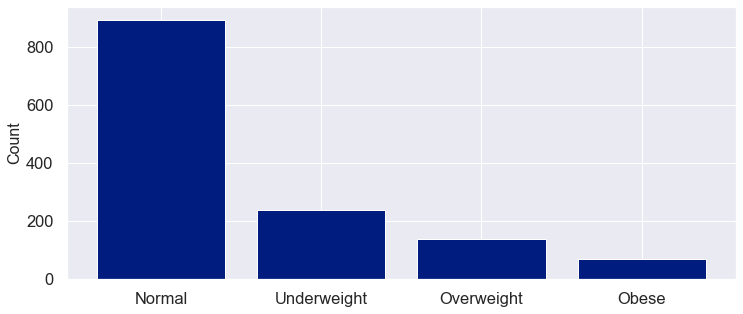

In [27]:
bmi_val=df["bmi_cat"].value_counts()
bmi_val=bmi_val.tolist()
style.use("seaborn-dark-palette")
labels=df["bmi_cat"].unique()
plt.figure(figsize=(12,5))
plt.bar(labels, bmi_val)
plt.ylabel("Count", fontsize=16)

Text(0, 0.5, 'Count')

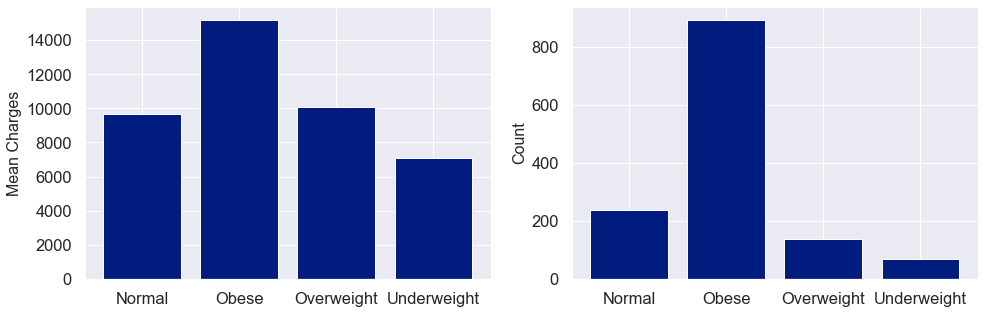

In [28]:
bmi_avg_charge=df.groupby("bmi_cat")["charges"].mean()
labels_a=bmi_avg_charge.keys()
bmi_avg_charge=bmi_avg_charge.tolist()

bmi_count_charge=df.groupby("bmi_cat")["charges"].count()
labels_c=bmi_count_charge.keys()
bmi_count_charge=bmi_count_charge.tolist()


style.use("seaborn-dark-palette")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(labels_a, bmi_avg_charge)
plt.ylabel("Mean Charges", fontsize=16)

plt.subplot(1,2,2)
plt.bar(labels_c, bmi_count_charge)
plt.ylabel("Count", fontsize=16)

C:\Users\fawad.kamil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fawad.kamil\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

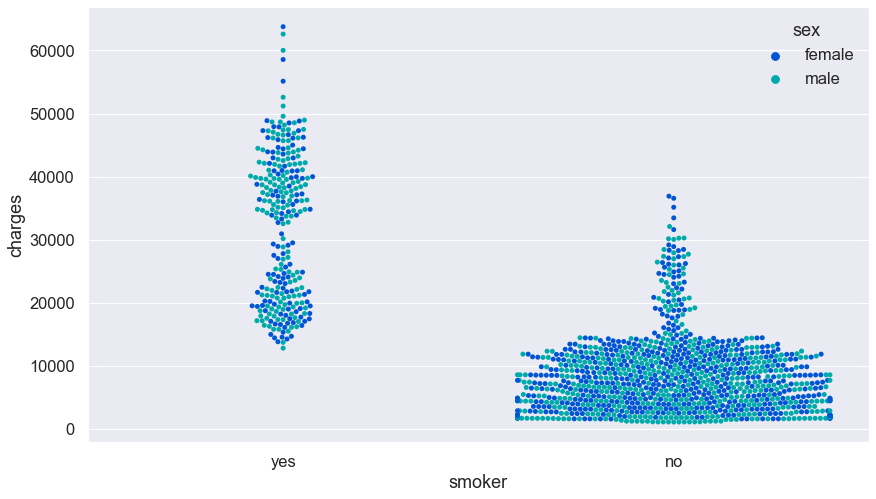

In [29]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.swarmplot(df["smoker"], df["charges"],hue=df["sex"], palette="winter")

bmi_cat        Normal         Obese    Overweight   Underweight
smoker                                                         
no        4248.268569  10373.029092   5485.185211   3215.162259
yes      28490.498279  34450.257426  26649.542370  25473.730221


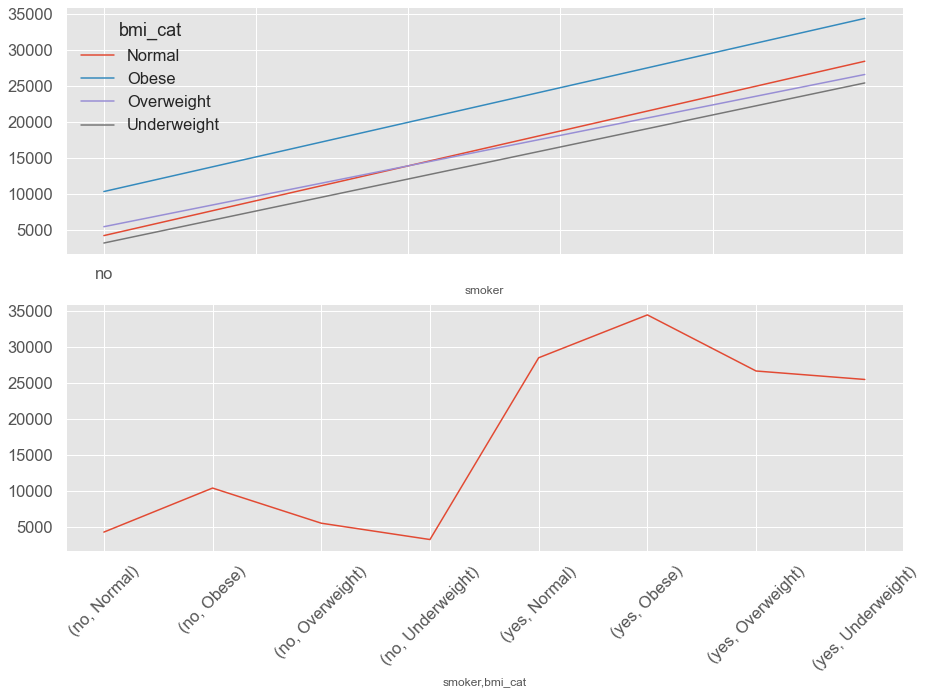

In [31]:
plt.figure(figsize=(15,10))
style.use("ggplot")
ax=plt.subplot(2,1,1)
smk_bmi=df.groupby(["smoker", "bmi_cat"])["charges"].mean().unstack()
print(smk_bmi)
smk_bmi.plot(ax=ax)

ax=plt.subplot(2,1,2)
smk_bmi=df.groupby(["smoker", "bmi_cat"])["charges"].mean().plot(ax=ax)
ax.tick_params('x',labelrotation=45)

# Standardisation of Data

In [33]:
df_c

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [34]:
std_scl=StandardScaler()
df_std=std_scl.fit_transform(df_c)
print("columns as age, bmi. children, charges")
print(df_std)

columns as age, bmi. children, charges
[[-1.43876426 -0.45332    -0.90861367  0.2985838 ]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917]
 [-0.79795355  0.38330685  1.58092576 -0.72867467]
 ...
 [-1.50996545  1.0148781  -0.90861367 -0.96159623]
 [-1.29636188 -0.79781341 -0.90861367 -0.93036151]
 [ 1.55168573 -0.26138796 -0.90861367  1.31105347]]


In [35]:
bmi_charg_c=df_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

[[-0.45332     0.2985838 ]
 [ 0.5096211  -0.95368917]
 [ 0.38330685 -0.72867467]
 ...
 [ 1.0148781  -0.96159623]
 [-0.79781341 -0.93036151]
 [-0.26138796  1.31105347]]
(1338, 2)


# Clustering

In [37]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(bmi_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

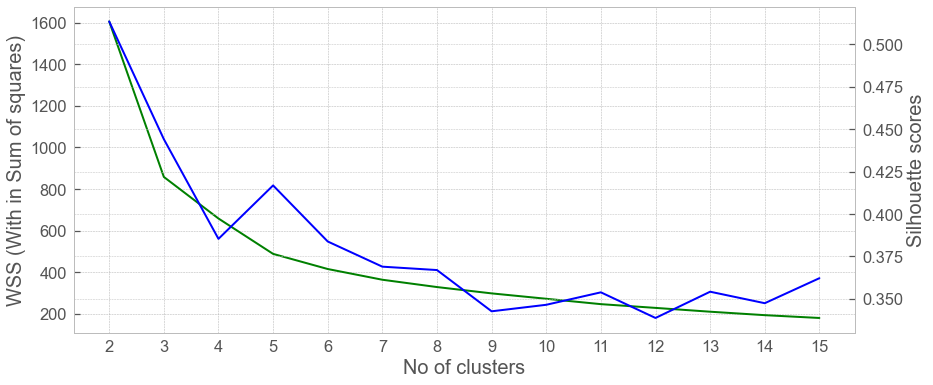

In [38]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [39]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
df["clusters"]=clusters
df

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,0
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,2
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,2
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,0
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,2
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,2
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,2
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,0


In [40]:
df2=df.sort_values(["clusters"]).copy()

In [41]:
for i in range(0,k+1):
    df2["clusters"]=df2["clusters"].replace(i, chr(i+65))
    
df2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,A
990,26,female,19.800,1,no,southwest,3378.91000,Young Adult,8.125308,Overweight,A
989,24,female,20.520,0,yes,northeast,14571.89080,Young Adult,9.586850,Normal,A
986,43,male,30.115,3,no,northwest,8410.04685,Adult,9.037182,Obese,A
985,44,female,25.800,1,no,southwest,7624.63000,Adult,8.939139,Obese,A
...,...,...,...,...,...,...,...,...,...,...,...
525,18,female,33.880,0,no,southeast,11482.63485,Young Adult,9.348591,Underweight,C
528,46,male,39.425,1,no,northeast,8342.90875,Adult,9.029167,Obese,C
531,62,female,31.730,0,no,northeast,14043.47670,Old,9.549913,Obese,C
510,56,male,32.110,1,no,northeast,11763.00090,Adult,9.372714,Obese,C


In [42]:
df2["clusters"].unique()

array(['A', 'B', 'C'], dtype=object)

In [43]:
x=df2.iloc[:,[2,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on BMI??')

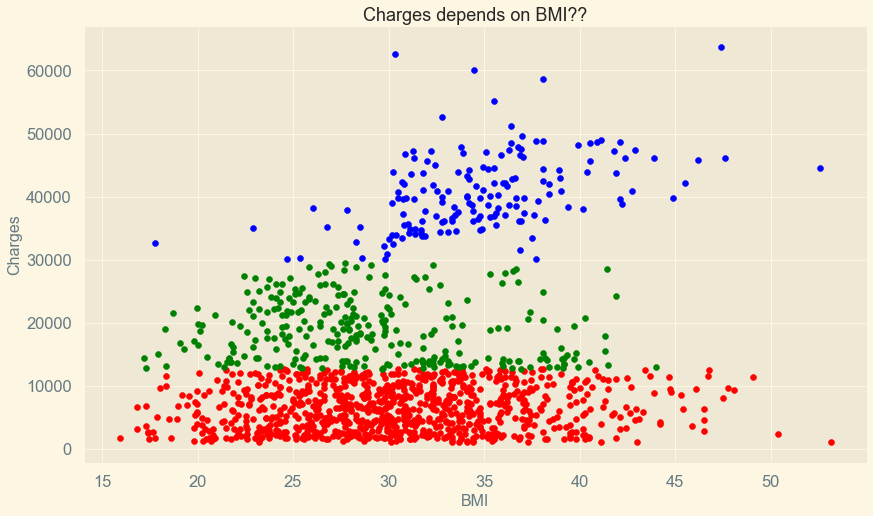

In [45]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on BMI??", fontsize=18)

In [47]:
age_charg_c=df_std[:,[0,3]]
print(age_charg_c)
print(age_charg_c.shape)

[[-1.43876426  0.2985838 ]
 [-1.50996545 -0.95368917]
 [-0.79795355 -0.72867467]
 ...
 [-1.50996545 -0.96159623]
 [-1.29636188 -0.93036151]
 [ 1.55168573  1.31105347]]
(1338, 2)


In [48]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(age_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

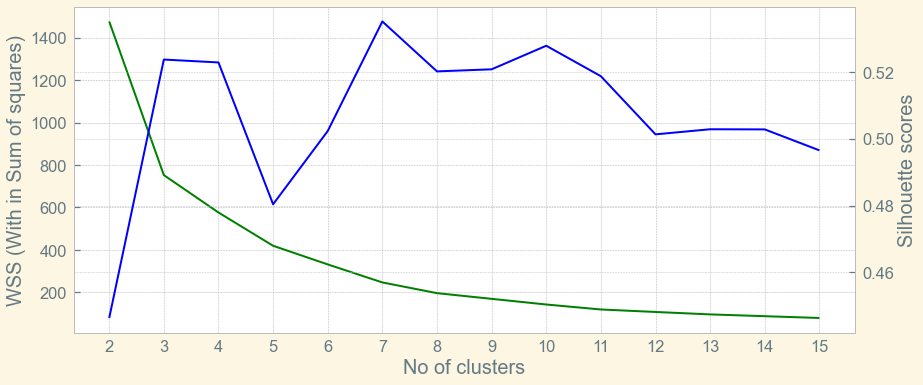

In [49]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [50]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
df["clusters"]=clusters
df

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,1
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,1
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,1
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,1
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,0
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,1
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,1
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,1


In [52]:
df2=df.sort_values(["clusters"]).copy()

In [53]:
for i in range(0,k+1):
    df2["clusters"]=df2["clusters"].replace(i, chr(i+65))
    
df2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
1337,61,female,29.070,0,yes,northwest,29141.36030,Old,10.279914,Obese,A
1020,51,male,37.000,0,no,southwest,8798.59300,Adult,9.082347,Obese,A
489,53,male,31.160,1,no,northwest,10461.97940,Adult,9.255503,Obese,A
491,61,female,25.080,0,no,southeast,24513.09126,Old,10.106963,Obese,A
1018,54,female,35.815,3,no,northwest,12495.29085,Adult,9.433107,Obese,A
...,...,...,...,...,...,...,...,...,...,...,...
621,37,male,34.100,4,yes,southwest,40182.24600,Adult,10.601181,Obese,C
252,54,male,34.210,2,yes,southeast,44260.74990,Adult,10.697854,Obese,C
251,63,female,32.200,2,yes,southwest,47305.30500,Old,10.764378,Obese,C
271,50,male,34.200,2,yes,southwest,42856.83800,Adult,10.665620,Obese,C


In [54]:
x=df2.iloc[:,[0,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on Age??')

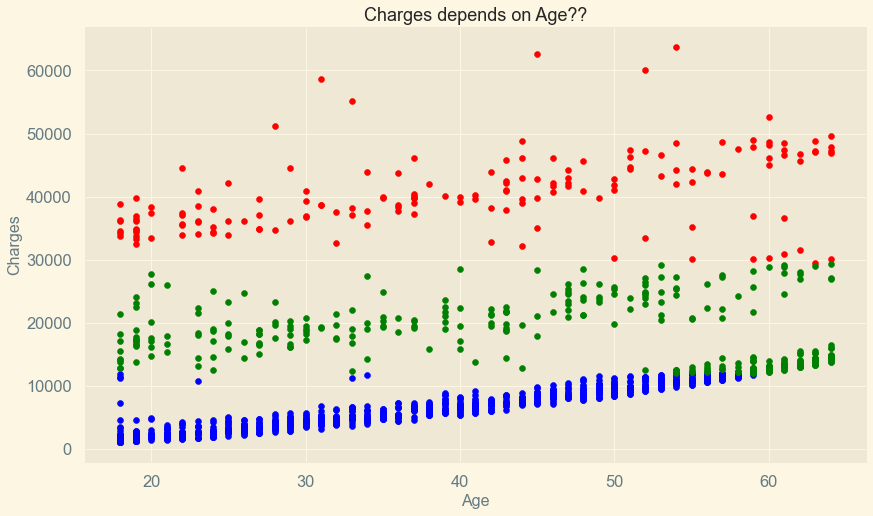

In [55]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on Age??", fontsize=18)

# PValue test

In [56]:
df2["smoker"]=df2["smoker"].replace(["yes", "no"],[1,0])

In [57]:
pval=ols("charges~bmi+age+children+smoker", data=df).fit()
print(pval.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:30:50   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    941.984    -12.848